# Custom Model training - Cost 5.8 USD

https://github.com/openai/openai-cookbook/blob/main/examples/Fine-tuned_classification.ipynb

In [9]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import openai

categories = ['rec.sport.baseball', 'rec.sport.hockey']
sports_dataset = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories=categories)

In [10]:
print(sports_dataset['data'][0])

From: dougb@comm.mot.com (Doug Bank)
Subject: Re: Info needed for Cleveland tickets
Reply-To: dougb@ecs.comm.mot.com
Organization: Motorola Land Mobile Products Sector
Distribution: usa
Nntp-Posting-Host: 145.1.146.35
Lines: 17

In article <1993Apr1.234031.4950@leland.Stanford.EDU>, bohnert@leland.Stanford.EDU (matthew bohnert) writes:

|> I'm going to be in Cleveland Thursday, April 15 to Sunday, April 18.
|> Does anybody know if the Tribe will be in town on those dates, and
|> if so, who're they playing and if tickets are available?

The tribe will be in town from April 16 to the 19th.
There are ALWAYS tickets available! (Though they are playing Toronto,
and many Toronto fans make the trip to Cleveland as it is easier to
get tickets in Cleveland than in Toronto.  Either way, I seriously
doubt they will sell out until the end of the season.)

-- 
Doug Bank                       Private Systems Division
dougb@ecs.comm.mot.com          Motorola Communications Sector
dougb@nwu.edu       

In [11]:
sports_dataset.target_names[sports_dataset['target'][0]]

'rec.sport.baseball'

In [12]:
len_all, len_baseball, len_hockey = len(sports_dataset.data), len([e for e in sports_dataset.target if e == 0]), len([e for e in sports_dataset.target if e == 1])
print(f"Total examples: {len_all}, Baseball examples: {len_baseball}, Hockey examples: {len_hockey}")

Total examples: 1197, Baseball examples: 597, Hockey examples: 600


In [13]:
import pandas as pd

labels = [sports_dataset.target_names[x].split('.')[-1] for x in sports_dataset['target']]
texts = [text.strip() for text in sports_dataset['data']]
df = pd.DataFrame(zip(texts, labels), columns = ['prompt','completion']) #[:300]
df.head()

,prompt,completion
0,From: dougb@comm.mot.com (Doug Bank)\nSubject:...,baseball
1,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,hockey
2,From: rudy@netcom.com (Rudy Wade)\nSubject: Re...,baseball
3,From: monack@helium.gas.uug.arizona.edu (david...,hockey
4,Subject: Let it be Known\nFrom: <ISSBTL@BYUVM....,baseball


In [14]:
df.to_json("sport2.jsonl", orient='records', lines=True)

In [15]:
!pip install --upgrade openai

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached openai-0.27.2-py3-none-any.whl (70 kB)
     |████████████████████████████████| 338 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 62 kB 5.3 MB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 311 kB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 12.1 MB/s eta 0:00:01
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using ca

In [17]:
!pip install --upgrade pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 11.0 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 125.3 MB/s eta 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discuss

In [18]:
!openai tools fine_tunes.prepare_data -f sport2.jsonl -q

Analyzing...

- Your file contains 1197 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 11 examples that are very long. These are rows: [134, 200, 281, 320, 404, 595, 704, 838, 1113, 1139, 1174]
For conditional generation, and for classification the examples shouldn't be longer than 2048 tokens.
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts e

In [20]:
!openai api fine_tunes.create -t "sport2_prepared_train.jsonl" -v "sport2_prepared_valid.jsonl" --compute_classification_metrics --classification_positive_class " baseball"

Upload progress: 100%|████████████████████| 1.52M/1.52M [00:00<00:00, 1.13Git/s]
Uploaded file from sport2_prepared_train.jsonl: file-vlYJHuiuFIsy1u49YUzQaWXF
Upload progress: 100%|███████████████████████| 387k/387k [00:00<00:00, 274Mit/s]
Uploaded file from sport2_prepared_valid.jsonl: file-xEl6lQKusYDWSM21qJ616Lo9
Created fine-tune: ft-f1kfZommOz0K7YhTBOUEkJfl
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-04-02 11:20:10] Created fine-tune: ft-f1kfZommOz0K7YhTBOUEkJfl

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-f1kfZommOz0K7YhTBOUEkJfl



In [27]:
!openai api fine_tunes.follow -i ft-f1kfZommOz0K7YhTBOUEkJfl

[2023-04-02 11:20:10] Created fine-tune: ft-f1kfZommOz0K7YhTBOUEkJfl
[2023-04-02 11:24:37] Fine-tune costs $5.83
[2023-04-02 11:24:38] Fine-tune enqueued. Queue number: 0
[2023-04-02 11:34:40] Fine-tune started
[2023-04-02 11:38:39] Completed epoch 1/4
[2023-04-02 11:41:44] Completed epoch 2/4
[2023-04-02 11:44:48] Completed epoch 3/4
[2023-04-02 11:47:51] Completed epoch 4/4
[2023-04-02 11:48:20] Uploaded model: curie:ft-chanbistec-2023-04-02-06-18-20
[2023-04-02 11:48:21] Uploaded result file: file-52PnyK5IOFtieG6rKYC8ruQ4
[2023-04-02 11:48:21] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-chanbistec-2023-04-02-06-18-20 -p <YOUR_PROMPT>


In [28]:
!openai api fine_tunes.results -i ft-f1kfZommOz0K7YhTBOUEkJfl > result.csv

In [29]:
results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
3720,3721,1692633,3721,0.0092,1.0,1.0,0.020382,1.0,1.0,0.995798,0.991736,1.0,1.0,1.0,0.995851


Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


<Axes: >

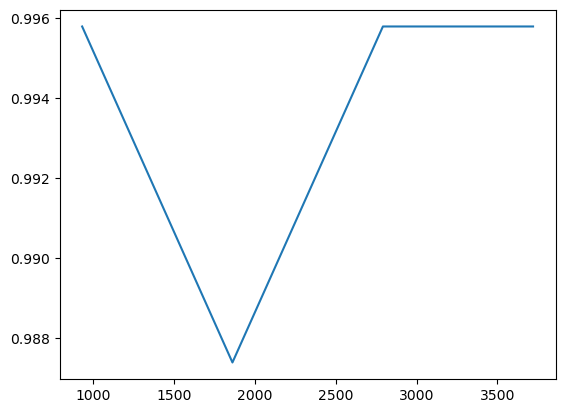

In [30]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [31]:
test = pd.read_json('sport2_prepared_valid.jsonl', lines=True)
test.head()

,prompt,completion
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...,hockey
1,From: smorris@venus.lerc.nasa.gov (Ron Morris ...,hockey
2,From: golchowy@alchemy.chem.utoronto.ca (Geral...,hockey
3,From: krattige@hpcc01.corp.hp.com (Kim Krattig...,baseball
4,From: warped@cs.montana.edu (Doug Dolven)\nSub...,baseball


In [33]:
ft_model = 'curie:ft-chanbistec-2023-04-02-06-18-20'
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][0] + '\n\n###\n\n', max_tokens=1, temperature=0)
res['choices'][0]['text']

' hockey'

In [34]:
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][0] + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['logprobs']['top_logprobs'][0]

<OpenAIObject at 0x16a071170> JSON: {
  " Hockey": -12.467391,
  " hockey": -6.5092986e-06
}

In [35]:
sample_hockey_tweet = """Thank you to the 
@Canes
 and all you amazing Caniacs that have been so supportive! You guys are some of the best fans in the NHL without a doubt! Really excited to start this new chapter in my career with the 
@DetroitRedWings
 !!"""
res = openai.Completion.create(model=ft_model, prompt=sample_hockey_tweet + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' hockey'

In [36]:
sample_baseball_tweet="""BREAKING: The Tampa Bay Rays are finalizing a deal to acquire slugger Nelson Cruz from the Minnesota Twins, sources tell ESPN."""
res = openai.Completion.create(model=ft_model, prompt=sample_baseball_tweet + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' baseball'